# 1. Import Data

In [ ]:
import pandas as pd

df0 = pd.read_csv('https://dev.km2.ai/public/parcels_last.csv', low_memory=False) # 1.5 Gb, 2488394 lines, ~3 minutes


In [ ]:
df1 = df0[['EffectiveYearBuilt','SQFTmain','Bedrooms','Bathrooms','Units','PropertyType','GeneralUseType','isTaxableParcel','AdministrativeRegion','netTaxableValue']]
# drop N.A.
import numpy as np
import random
df1['EffectiveYearBuilt']=df1['EffectiveYearBuilt'].replace(0, np.nan)
df1['SQFTmain']=df1['SQFTmain'].replace(0, np.nan)
df1['netTaxableValue']=df1['netTaxableValue'].replace(0, np.nan)
df1_1 = df1.dropna() 
df1_2 = df1_1.sample(n=3000) # sample n=3000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df1_2

,EffectiveYearBuilt,SQFTmain,Bedrooms,Bathrooms,Units,PropertyType,GeneralUseType,isTaxableParcel,AdministrativeRegion,netTaxableValue
2086505,1941.0,1629.0,2,2,1,SFR,Residential,Y,11,198373.0
1706894,1950.0,840.0,2,1,1,SFR,Residential,Y,11,74690.0
1201665,1949.0,1511.0,3,2,1,SFR,Residential,Y,05,878836.0
2043313,1976.0,2387.0,5,3,1,SFR,Residential,Y,11,423186.0
477313,2002.0,3262.0,5,3,1,SFR,Residential,Y,B1,535154.0
...,...,...,...,...,...,...,...,...,...,...
398572,1975.0,2792.0,5,3,1,SFR,Residential,Y,02,489735.0
1937747,1997.0,2116.0,4,3,1,SFR,Residential,Y,10,361485.0
592606,1955.0,2532.0,3,2,1,SFR,Residential,Y,A1,393000.0
295107,1989.0,1540.0,3,3,1,CND,Residential,Y,03,293107.0


In [ ]:
df1_2.to_csv('sample1.csv') # sample n=3000

# 2. Data Processing

In [ ]:
from pandas.core.frame import DataFrame
dataset = pd.read_csv('sample1.csv', encoding='gbk')
dataset.columns

Index(['Unnamed: 0', 'EffectiveYearBuilt', 'SQFTmain', 'Bedrooms', 'Bathrooms',
       'Units', 'PropertyType', 'GeneralUseType', 'isTaxableParcel',
       'AdministrativeRegion', 'netTaxableValue'],
      dtype='object')

In [ ]:
dataset.columns = ['ID', 'EffectiveYearBuilt', 'SQFTmain', 'Bedrooms', 'Bathrooms',
       'Units', 'PropertyType', 'GeneralUseType', 'isTaxableParcel',
       'AdministrativeRegion', 'netTaxableValue']
dataset

,ID,EffectiveYearBuilt,SQFTmain,Bedrooms,Bathrooms,Units,PropertyType,GeneralUseType,isTaxableParcel,AdministrativeRegion,netTaxableValue
0,2086505,1941.0,1629.0,2,2,1,SFR,Residential,Y,11,198373.0
1,1706894,1950.0,840.0,2,1,1,SFR,Residential,Y,11,74690.0
2,1201665,1949.0,1511.0,3,2,1,SFR,Residential,Y,05,878836.0
3,2043313,1976.0,2387.0,5,3,1,SFR,Residential,Y,11,423186.0
4,477313,2002.0,3262.0,5,3,1,SFR,Residential,Y,B1,535154.0
...,...,...,...,...,...,...,...,...,...,...,...
2995,398572,1975.0,2792.0,5,3,1,SFR,Residential,Y,02,489735.0
2996,1937747,1997.0,2116.0,4,3,1,SFR,Residential,Y,10,361485.0
2997,592606,1955.0,2532.0,3,2,1,SFR,Residential,Y,A1,393000.0
2998,295107,1989.0,1540.0,3,3,1,CND,Residential,Y,03,293107.0


In [ ]:
dataset.head(75)

,ID,EffectiveYearBuilt,SQFTmain,Bedrooms,Bathrooms,Units,PropertyType,GeneralUseType,isTaxableParcel,AdministrativeRegion,netTaxableValue
0,2086505,1941.0,1629.0,2,2,1,SFR,Residential,Y,11,198373.0
1,1706894,1950.0,840.0,2,1,1,SFR,Residential,Y,11,74690.0
2,1201665,1949.0,1511.0,3,2,1,SFR,Residential,Y,05,878836.0
3,2043313,1976.0,2387.0,5,3,1,SFR,Residential,Y,11,423186.0
4,477313,2002.0,3262.0,5,3,1,SFR,Residential,Y,B1,535154.0
...,...,...,...,...,...,...,...,...,...,...,...
70,815186,2007.0,5482.0,5,7,1,SFR,Residential,Y,14,2784408.0
71,2240359,1962.0,1482.0,4,2,1,SFR,Residential,Y,06,64511.0
72,1014390,1928.0,2934.0,2,1,1,OTH,Institutional,Y,25,195433.0
73,1895845,1988.0,1490.0,3,3,1,CND,Residential,Y,14,393212.0


## 2.1 Numerical Variables

In [ ]:
# Calculate effective year based on 2022
dataset['EffectiveYear']=2022-dataset['EffectiveYearBuilt'] 
dataset = dataset.drop(columns=['EffectiveYearBuilt'])
dataset.head()

,ID,SQFTmain,Bedrooms,Bathrooms,Units,PropertyType,GeneralUseType,isTaxableParcel,AdministrativeRegion,netTaxableValue,EffectiveYear
0,2086505,1629.0,2,2,1,SFR,Residential,Y,11,198373.0,81.0
1,1706894,840.0,2,1,1,SFR,Residential,Y,11,74690.0,72.0
2,1201665,1511.0,3,2,1,SFR,Residential,Y,05,878836.0,73.0
3,2043313,2387.0,5,3,1,SFR,Residential,Y,11,423186.0,46.0
4,477313,3262.0,5,3,1,SFR,Residential,Y,B1,535154.0,20.0


## 2.2 Dummy Variables

### 2.2.1 PropertyType

In [ ]:
print("PropertyType",dataset["PropertyType"].unique())

PropertyType ['SFR' 'CND' 'VAC' 'R-I' 'OTH' 'C/I']


In [ ]:
# making Group by PropertyType
ave_PropertyType = dataset.drop(['ID','SQFTmain','Bedrooms','Bathrooms','Units','EffectiveYear'], axis=1).groupby("PropertyType").mean()
ave_PropertyType

,netTaxableValue
PropertyType,
C/I,4.120178e+06
CND,4.933757e+05
OTH,2.563552e+06
R-I,1.052811e+06
SFR,5.680542e+05
VAC,1.700000e+07


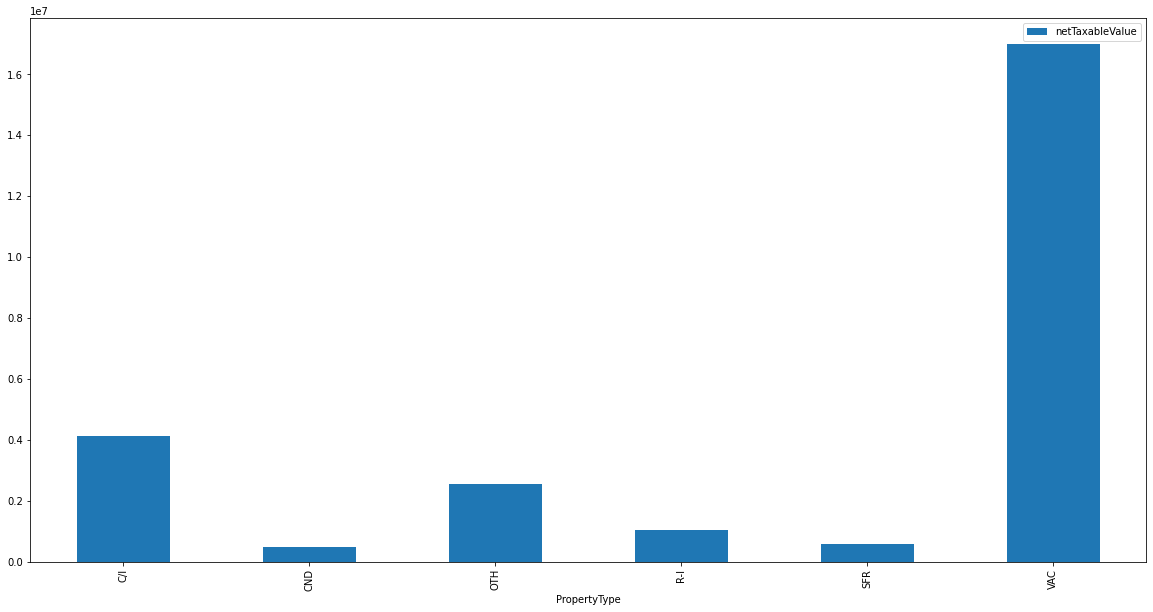

In [ ]:
# graph the group by PropertyType
ave_PropertyType.plot(kind="bar",figsize=(20,10))

In [ ]:
# From the plot, set VAC Type as 1, the other as 0
PropertyTypeDict={'SFR':0, 'CND':0, 'R-I':0,'C/I':0,'OTH':0,'VAC':1}
dataset['PropertyType Map']=dataset['PropertyType'].map(PropertyTypeDict)

### 2.2.2 GeneralUseType

In [ ]:
print("GeneralUseType",dataset["GeneralUseType"].unique())

GeneralUseType ['Residential' 'Institutional' 'Commercial' 'Industrial' 'Recreational'
 'Irrigated Farm']


In [ ]:
# making Group by GeneralUseType
ave_GeneralUseType = dataset.drop(['ID','SQFTmain','Bedrooms','Bathrooms','Units','EffectiveYear','PropertyType Map'], axis=1).groupby("GeneralUseType").mean()
ave_GeneralUseType

,netTaxableValue
GeneralUseType,
Commercial,2.985101e+06
Industrial,7.081840e+06
Institutional,3.057823e+06
Irrigated Farm,9.219500e+04
Recreational,1.373525e+06
Residential,6.198165e+05


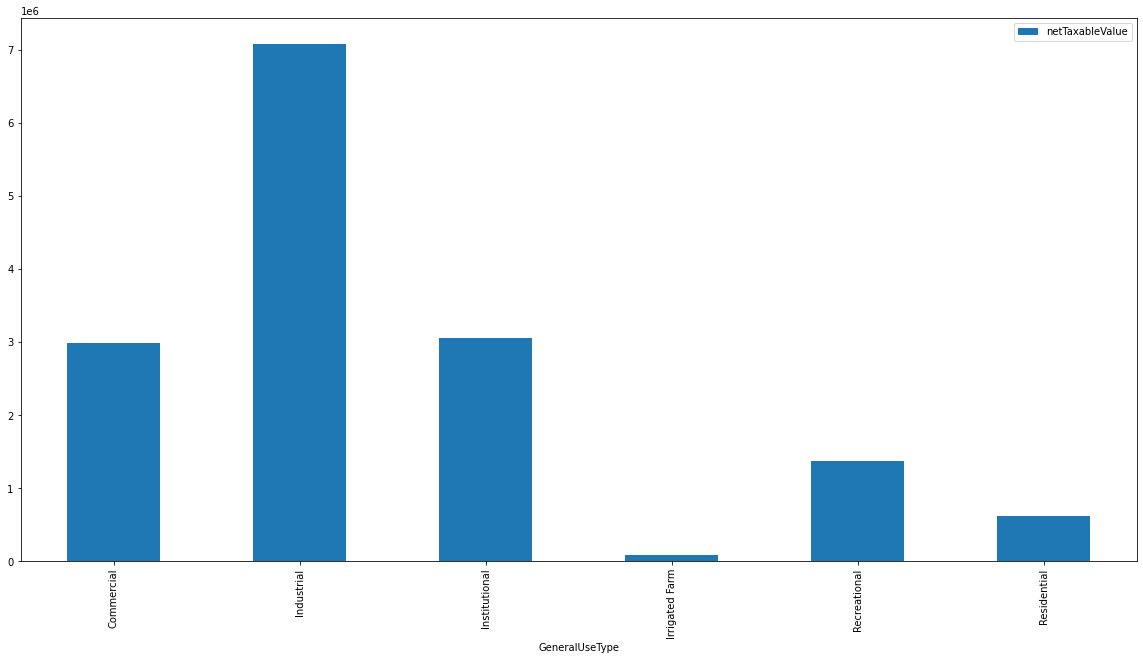

In [ ]:
# graph the group by PropertyType
ave_GeneralUseType.plot(kind="bar",figsize=(20,10))

In [ ]:
# From the plot, set Industrial Type as 1, the other as 0
GeneralUseTypeDict={'Residential':0, 'Industrial':1, 'Commercial':0, 'Institutional':0, 'Recreational':0, 'Irrigated Farm':0}
dataset['GeneralUseType Map']=dataset['GeneralUseType'].map(GeneralUseTypeDict)

### 2.2.3 isTaxableParcel

In [ ]:
print("isTaxableParcel",dataset["isTaxableParcel"].unique())

isTaxableParcel ['Y']


In [ ]:
dataset['isTaxableParcel'].drop_duplicates()
isTaxableParcelDict={'Y':1,'N':0}
dataset['isTaxableParcel Map']=dataset['isTaxableParcel'].map(isTaxableParcelDict)

### 2.2.4 AdministrativeRegion

In [ ]:
print("AdministrativeRegion",dataset["AdministrativeRegion"].unique())

AdministrativeRegion ['11' '05' 'B1' 'A1' '02' '14' '04' '03' '09' '06' '12' '10' '25' '23'
 '07' '24' '26' '27' '28' '30']


In [ ]:
# making Group by AdministrativeRegion
ave_AdministrativeRegion = dataset.drop(['ID','SQFTmain','Bedrooms','Bathrooms','Units','EffectiveYear','PropertyType Map','isTaxableParcel Map','GeneralUseType Map'], axis=1).groupby("AdministrativeRegion").mean()
ave_AdministrativeRegion

,netTaxableValue
AdministrativeRegion,
02,7.405737e+05
03,6.352210e+05
04,5.909459e+05
05,5.948187e+05
06,4.044823e+05
07,1.618111e+06
09,6.564261e+05
10,4.316973e+05
11,3.366207e+05


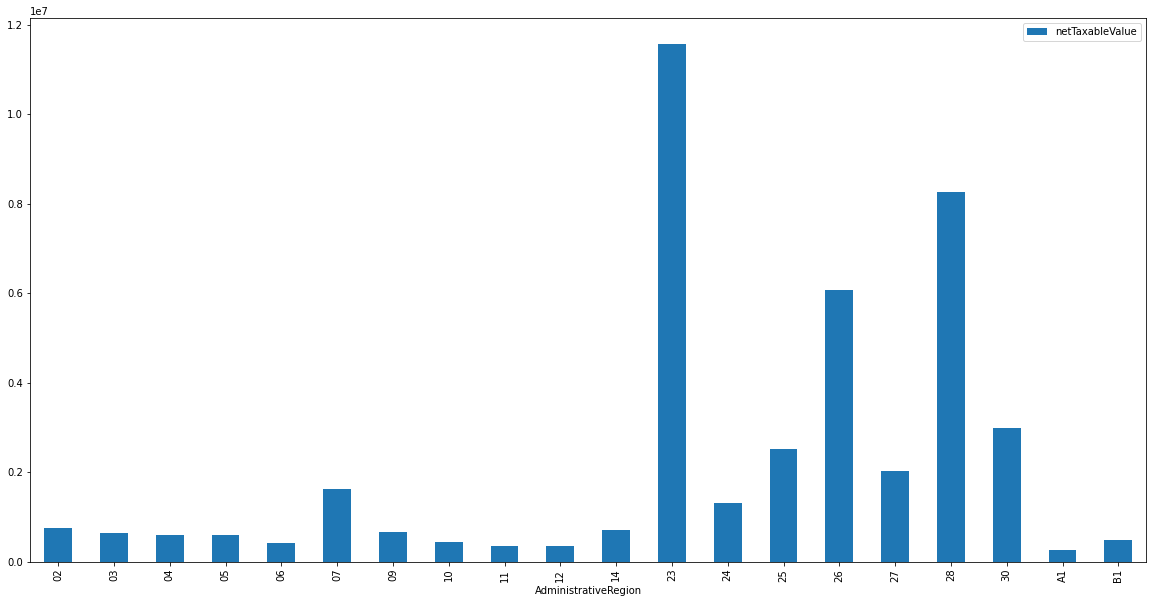

In [ ]:
# graph the group by PropertyType
ave_AdministrativeRegion.plot(kind="bar",figsize=(20,10))

In [ ]:
# set "23" Type as 2; "26" Type and "28" Type as 1; the others as 0
dataset['AdministrativeRegion'].drop_duplicates()
AdministrativeRegionDict={'11':0, '05':0, 'B1':0, 'A1':0, '02':0, '14':0, '04':0, '03':0, '09':0, '06':0, '12':0,
                          '10':0, '25':0, '23':2,'07':0, '24':0, '26':1, '27':0, '28':1, '30':0}
dataset['AdministrativeRegion Map']=dataset['AdministrativeRegion'].map(AdministrativeRegionDict)

In [ ]:
datanew= dataset[['netTaxableValue','EffectiveYear','SQFTmain','Bedrooms','Bathrooms','Units','PropertyType Map','GeneralUseType Map','isTaxableParcel Map','AdministrativeRegion Map']]
datanew.to_csv('datanew.csv')
datanew

,netTaxableValue,EffectiveYear,SQFTmain,Bedrooms,Bathrooms,Units,PropertyType Map,GeneralUseType Map,isTaxableParcel Map,AdministrativeRegion Map
0,198373.0,81.0,1629.0,2,2,1,0,0,1,0
1,74690.0,72.0,840.0,2,1,1,0,0,1,0
2,878836.0,73.0,1511.0,3,2,1,0,0,1,0
3,423186.0,46.0,2387.0,5,3,1,0,0,1,0
4,535154.0,20.0,3262.0,5,3,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
2995,489735.0,47.0,2792.0,5,3,1,0,0,1,0
2996,361485.0,25.0,2116.0,4,3,1,0,0,1,0
2997,393000.0,67.0,2532.0,3,2,1,0,0,1,0
2998,293107.0,33.0,1540.0,3,3,1,0,0,1,0


## 2.3 Missing Value Check

In [ ]:
pd.DataFrame({'Missing Values': datanew.isna().sum()})

,Missing Values
netTaxableValue,0
EffectiveYear,0
SQFTmain,0
Bedrooms,0
Bathrooms,0
Units,0
PropertyType Map,0
GeneralUseType Map,0
isTaxableParcel Map,0
AdministrativeRegion Map,0


The table above shows that there is no missing values in each column.

# 3. Plot of Variables

## 3.1 Correlation

Text(0.5, 1.0, 'Correlation')

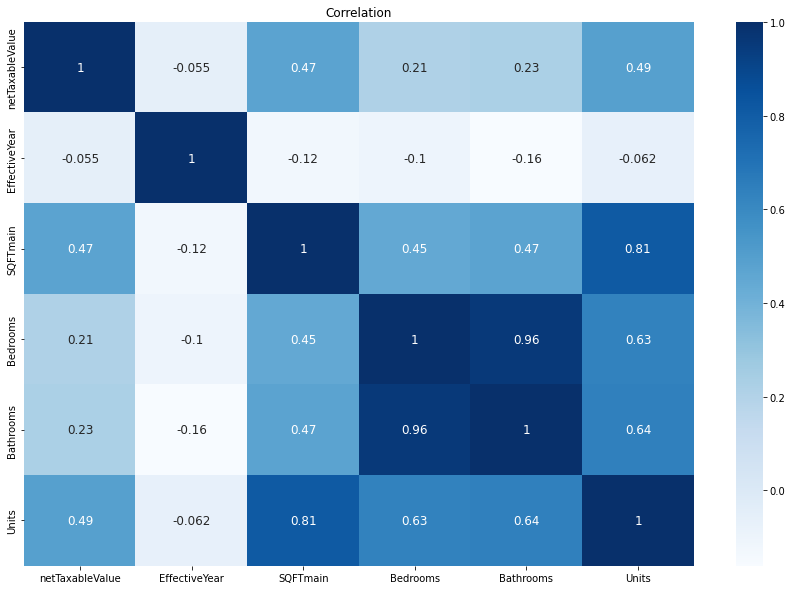

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = datanew.drop(['PropertyType Map','GeneralUseType Map','isTaxableParcel Map','AdministrativeRegion Map'],axis=1).corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap="Blues", annot_kws={"fontsize":12})
plt.title("Correlation")

Only Bathroom and Bedroom have relatively high correlation.

## 3.2 Skewness

Text(0.5, 0, 'Skewness')

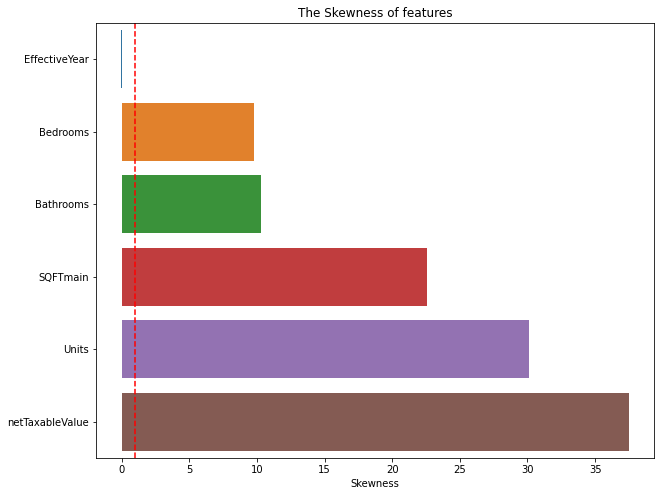

In [ ]:
df = datanew.drop(['PropertyType Map','GeneralUseType Map','isTaxableParcel Map','AdministrativeRegion Map'],axis=1)

plt.figure(figsize=(10,8))
skewness=df.skew().sort_values()
sns.barplot(x=skewness,y=skewness.index).set_title('The Skewness of features')
plt.axvline(x=1, color='r', linestyle='--')
plt.xlabel('Skewness')

Except for EffectiveYear, all other variables are highly skewed.

Therefore, taking Log transformation on SQFTmain and netTaxableValue, while keeping Bedrooms, Bathrooms and Units the same.

In [ ]:
# log transformation
df['SQFTmain']=df['SQFTmain'].apply(np.log)
df['netTaxableValue']=df['netTaxableValue'].apply(np.log)

In [ ]:
df

,netTaxableValue,EffectiveYear,SQFTmain,Bedrooms,Bathrooms,Units
0,12.197904,81.0,7.395722,2,2,1
1,11.221101,72.0,6.733402,2,1,1
2,13.686354,73.0,7.320527,3,2,1
3,12.955567,46.0,7.777793,5,3,1
4,13.190310,20.0,8.090096,5,3,1
...,...,...,...,...,...,...
2995,13.101620,47.0,7.934513,5,3,1
2996,12.797976,25.0,7.657283,4,3,1
2997,12.881565,67.0,7.836765,3,2,1
2998,12.588293,33.0,7.339538,3,3,1


## 3.3 Distribution

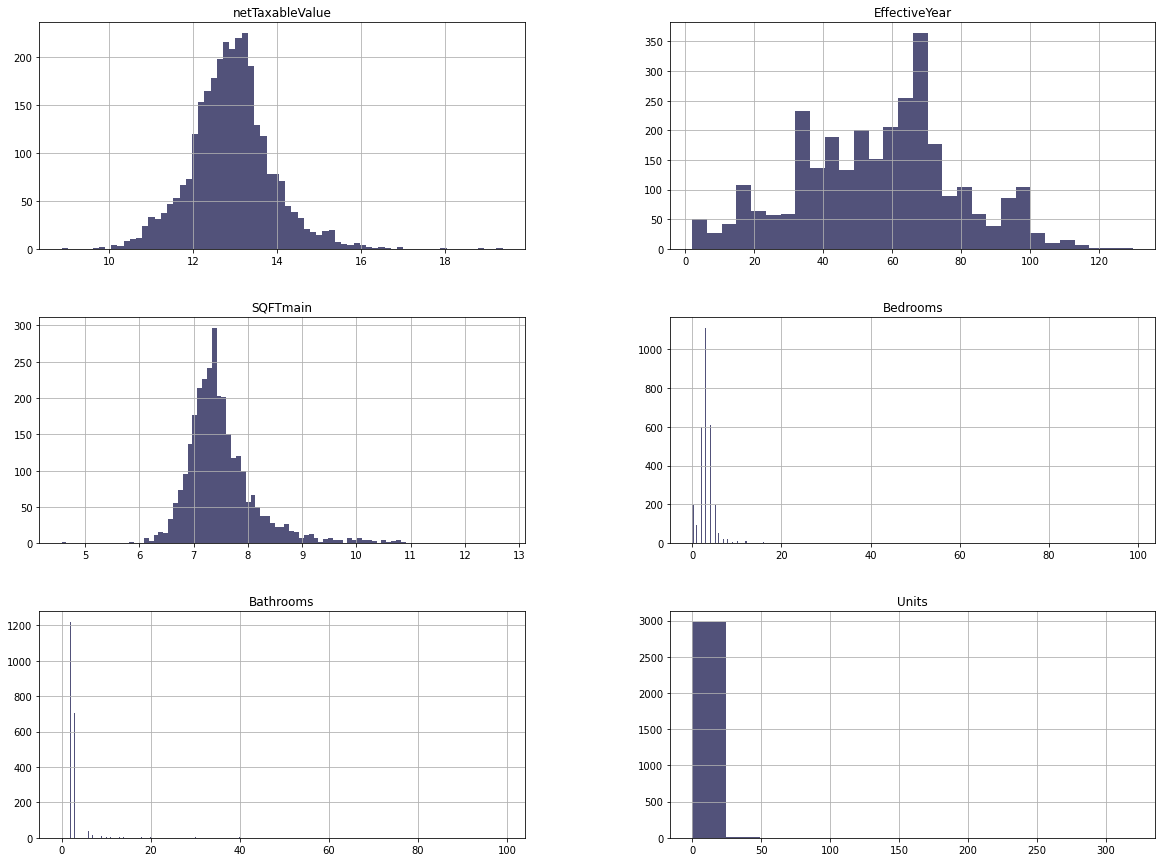

In [ ]:
df.hist(figsize=(20,15),bins='auto', color='#52527a')
plt.show()

# 4. Modeling

## 4.1 Splitting the data

In [ ]:
datanew['SQFTmain']=df['SQFTmain']
datanew['netTaxableValue']=df['netTaxableValue']

X = datanew.iloc[:, 1:10]
y = datanew.iloc[:, 0]

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## 4.2 Performing the training and testing session

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [ ]:
def evaluation(y_test, predictions):
    from sklearn.metrics  import mean_absolute_error
    from sklearn.metrics  import mean_squared_error
    from sklearn.metrics  import r2_score
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r_squared = r2_score(y_test, predictions)
    return mae, mse, r_squared

models = pd.DataFrame(columns=["Model","MAE","MSE","R2 Score"])

### 4.2.1 Multiple Linear Regression model

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
predictions_lr = lin_reg.predict(X_test)

cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state= 4085)
cross_val_score(lin_reg,X_train,y_train,cv=cv)

lr_score = np.mean(cross_val_score(lin_reg,X_train,y_train,cv=cv))
print(f'average cross validation score is {lr_score}')

mae, mse, r_squared = evaluation(y_test, predictions_lr)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse,"R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)


average cross validation score is 0.3892385274823028


### 4.2.2 Ridge Regression

In [ ]:
# ridge regression AKA linear regression with l2 regularization
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.40
Test set score: 0.31


In [ ]:
# ridge regression with alpha =10
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.40
Test set score: 0.31


In [ ]:
# ridge regression with alphaa=0.1
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.40
Test set score: 0.31


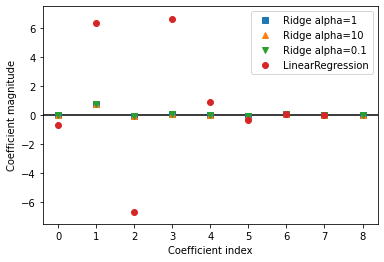

In [ ]:
# visualizaiton of ridge regression
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-7.5, 7.5)
plt.legend()

In [ ]:
# choose alpha=0.1
predictions = ridge01.predict(X_test)

cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state= 4085)
cross_val_score(ridge01,X_train,y_train,cv=cv)

rr_score = np.mean(cross_val_score(ridge01,X_train,y_train,cv=cv))
print(f'average cross validation score is {rr_score}')

mae, mse, r_squared = evaluation(y_test, predictions)

new_row = {"Model": "RidgeRegression","MAE": mae, "MSE": mse,"R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)

average cross validation score is 0.3892559945391084


### 4.2.3 LASSO Regression

In [ ]:
##### Laso Method AKA linear regression with L1 regularization

from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso.coef_ != 0))


Training set score: 0.12
Test set score: 0.10
Number of features used: 3


In [ ]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso001.coef_ != 0))

Training set score: 0.40
Test set score: 0.31
Number of features used: 5


In [ ]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso00001.coef_ != 0))

Training set score: 0.40
Test set score: 0.31
Number of features used: 8


Text(0, 0.5, 'Coefficient magnitude')

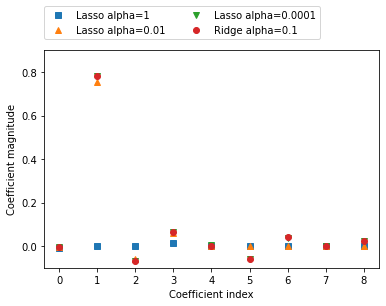

In [ ]:
# visualizaiton of LASSO regression
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-0.1, 0.9)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

In [ ]:
# Choose alpha=0.0001, max_iter=100000
predictions_la = lasso00001.predict(X_test)

cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state= 4085)
cross_val_score(lasso00001,X_train,y_train,cv=cv)

la_score = np.mean(cross_val_score(lasso00001,X_train,y_train,cv=cv))
print(f'average cross validation score is {la_score}')

mae, mse, r_squared = evaluation(y_test, predictions_la)

new_row = {"Model": "LassoRegression","MAE": mae, "MSE": mse,"R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)

average cross validation score is 0.38947009360689727


### 4.2.4 ElasticNetCV

In [ ]:
from sklearn.linear_model import ElasticNetCV
ENet = ElasticNetCV(cv=5, random_state=0)
ENet.fit(X, y)
print("Training set score: {:.2f}".format(ENet.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ENet.score(X_test, y_test)))
print("Number of features used:", np.sum(ENet.coef_ != 0))

Training set score: 0.40
Test set score: 0.31
Number of features used: 5


In [ ]:
predictions = ENet.predict(X_test)

cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state= 4085)
cross_val_score(ENet,X_train,y_train,cv=cv)

ela_score = np.mean(cross_val_score(ENet,X_train,y_train,cv=cv))
print(f'average cross validation score is {la_score}')

mae, mse, r_squared = evaluation(y_test, predictions)

new_row = {"Model": "ElasticNetCV","MAE": mae, "MSE": mse,"R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)

average cross validation score is 0.38947009360689727


### 4.2.5 SVM

In [ ]:
from sklearn.svm import SVR
svr = SVR(C=1000)
svr.fit(X_train, y_train)

cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state= 4085)
cross_val_score(svr,X_train,y_train,cv=cv)

svm_score = np.mean(cross_val_score(svr,X_train,y_train,cv=cv))
print(f'average cross validation score is {svm_score}')

predictions = svr.predict(X_test)
mae, mse, r_squared = evaluation(y_test, predictions)

new_row = {"Model": "SVM","MAE": mae, "MSE": mse,"R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)

average cross validation score is 0.3480949227910039


## 4.3 Models Summary

### 4.3.1 Model fitting

In [ ]:
models

,Model,MAE,MSE,R2 Score
0,LinearRegression,0.624411,0.645175,0.307683
1,RidgeRegression,0.624410,0.645178,0.307680
2,LassoRegression,0.624327,0.644935,0.307941
3,ElasticNetCV,0.622171,0.639239,0.314053
4,SVM,0.606329,0.644385,0.308532


### 4.3.2 Model Performance

In [ ]:
M_scores = {'LinearRegression': lr_score, 'RidgeRegression': rr_score, 'LassoRegression':la_score, 'ElasticNetCV':ela_score, 'SVM': svm_score,}
M_scores_df = pd.DataFrame(pd.Series(M_scores))
M_scores_df.columns = ['Scores']
M_scores_df['Name'] = ['LinearRegression', 'RidgeRegression', 'LassoRegression', 'ElasticNetCV', 'SVM']

M_scores_df.set_index(pd.Index([1, 2, 3 , 4, 5]))


,Scores,Name
1,0.389239,LinearRegression
2,0.389256,RidgeRegression
3,0.389470,LassoRegression
4,0.380495,ElasticNetCV
5,0.348095,SVM


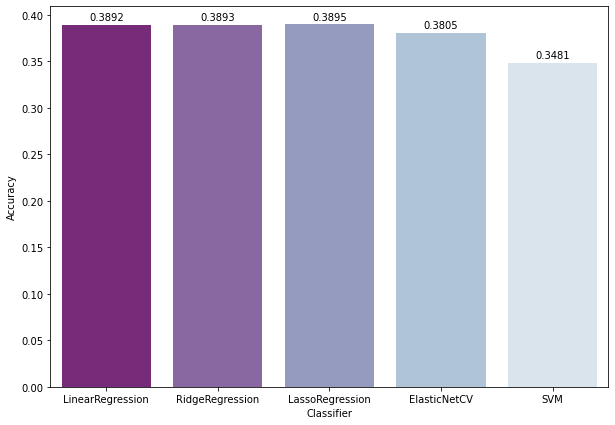

In [ ]:
# Visualizaiton
plt.figure(figsize=[10, 7])
axis = sns.barplot(x = 'Name', y = 'Scores', data = M_scores_df, palette="BuPu_r")
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 

Therefore, we choose Lasso Regression as the final model.

# 5. Identify Top 10 Undervalued Projects

In [ ]:
# creat a table to list errors
err = pd.DataFrame(columns = ['y_test', 'y_pred'])
err['y_test'] = y_test
err['y_pred'] = predictions_la
err['undervalue'] = err['y_test'] - err['y_pred']

# TEN testing samples which received the largest positive errors
err_top = pd.DataFrame()
err_top = err.sort_values(by='undervalue', ascending = False)[0:10]

df = dataset[['ID', 'SQFTmain',	'Bedrooms',	'Bathrooms',	'Units',	'PropertyType',	
             'GeneralUseType',	'isTaxableParcel', 'AdministrativeRegion',	'netTaxableValue',	'EffectiveYear']]
# use top 10 index to find the features
feature = pd.DataFrame(df.values[err_top.index],
                       columns=(['ID', 'SQFTmain',	'Bedrooms',	'Bathrooms',	'Units',	'PropertyType',	
                                'GeneralUseType',	'isTaxableParcel', 'AdministrativeRegion',	'netTaxableValue',	'EffectiveYear']))
feature

,ID,SQFTmain,Bedrooms,Bathrooms,Units,PropertyType,GeneralUseType,isTaxableParcel,AdministrativeRegion,netTaxableValue,EffectiveYear
0,996035,4088.0,5,3,1,SFR,Residential,Y,07,15085235.0,52.0
1,940303,5777.0,4,8,1,SFR,Residential,Y,07,8251730.0,64.0
2,938997,2393.0,5,2,1,SFR,Residential,Y,07,2325724.0,84.0
3,890481,976.0,2,1,1,SFR,Residential,Y,07,1202328.0,94.0
4,2424277,2171.0,3,2,1,SFR,Residential,Y,09,2040000.0,91.0
5,976560,8633.0,6,7,1,SFR,Residential,Y,07,10298569.0,14.0
6,2451092,100.0,0,0,1,C/I,Commercial,Y,25,268490.0,22.0
7,957070,2970.0,4,4,1,SFR,Residential,Y,07,2988030.0,51.0
8,982428,2602.0,4,3,1,SFR,Residential,Y,07,2490158.0,47.0
9,925110,1488.0,2,3,1,SFR,Residential,Y,07,1433433.0,92.0
